In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

#hotel_bookings.csv在Peach目录下
df = pd.read_csv('hotel_bookings.csv')
#展示列表前5行
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [17]:
hoteltype = df.groupby("hotel").is_canceled.count().reset_index()
hoteltype

,hotel,is_canceled
0,City Hotel,79330
1,Resort Hotel,40060


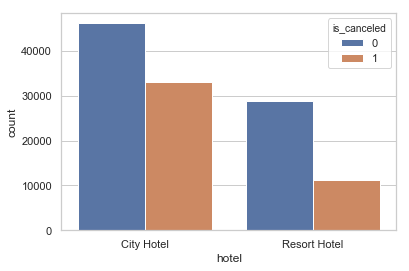

In [45]:
hotel_columns = ["hotel","count"]
sns.set(style="whitegrid")
#ax = sns.barplot(x = "hotel", y = "count",data=hoteltype)

cancelp=df.groupby(["hotel","is_canceled"]).lead_time.count().reset_index()
cancelp.columns=["hotel","is_canceled","count"]
ax = sns.barplot(x="hotel", y="count", hue="is_canceled", data=cancelp)

In [48]:
#转换预定日期的显示格式
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
#按reservation_status_date分组，计算每组里is_canceled总数，前面添加行标，并按reservation_status_date大小排序
is_canceled_plot = df.groupby("reservation_status_date").is_canceled.sum().reset_index().sort_values(by=["reservation_status_date"])
is_canceled_plot.head()

,reservation_status_date,is_canceled
0,2014-10-17,180
1,2014-11-18,1
2,2015-01-01,763
3,2015-01-02,16
4,2015-01-18,1
